In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata

#load the data from CBS, this might take a while..
#Taking the DBs from 2015 onwards, since 2014 and prior used a different format..
buurt_data_15 = pd.DataFrame(cbsodata.get_data("83220NED"))
buurt_data_16 = pd.DataFrame(cbsodata.get_data("83487NED"))
buurt_data_17 = pd.DataFrame(cbsodata.get_data("83765NED"))
buurt_data_18 = pd.DataFrame(cbsodata.get_data("84286NED"))
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")

In [2]:
dh_buurt_data_15 = buurt_data_15[(buurt_data_15["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_15["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_16 = buurt_data_16[(buurt_data_16["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_16["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_17 = buurt_data_17[(buurt_data_17["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_17["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_18 = buurt_data_18[(buurt_data_18["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_18["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]

In [18]:
education_17.head(5)

,Wijk,Wijkcode,Buurt,Buurtcode,bevolking,dekkingsgraad,Laag,RSF_Laag,Middelbaar,RSF_Middelbaar,Hoog,RSF_Hoog
0,NaN,NaN,NaN,NaN,405985,68.0,32.7,1.5,35.8,1.2,31.4,1.7
1,Wijk 01 Oostduinen ...,1.0,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.0,Oostduinen ...,70.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wijk 02 Belgisch Park ...,2.0,NaN,NaN,6295,60.5,17.1,7.3,37.5,6.3,45.4,5.6
4,NaN,2.0,Belgisch Park ...,71.0,6295,60.5,17.1,7.3,37.5,6.3,45.4,5.6


In [4]:
citizens_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")

In [5]:
total_citizens = pd.DataFrame()
total_citizens["2015"] = citizens_dh_15["total_citizens"]
total_citizens["2016"] = citizens_dh_16["total_citizens"]
total_citizens["2017"] = citizens_dh_17["total_citizens"]
total_citizens["2018"] = citizens_dh_18["total_citizens"]
total_citizens["2019"] = citizens_dh_19["total_citizens"]

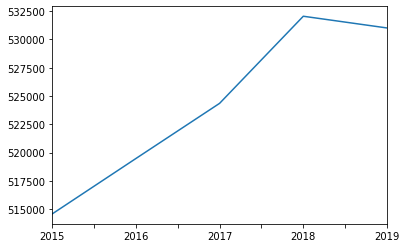

In [6]:
total_citizens.sum().plot()

In [15]:
wes_citizens = pd.DataFrame()
wes_citizens["2015"] = citizens_dh_15["total_western"]
wes_citizens["2016"] = citizens_dh_16["total_western"]
wes_citizens["2017"] = citizens_dh_17["total_western"]
wes_citizens["2018"] = citizens_dh_18["total_western"]
wes_citizens["2019"] = citizens_dh_19["total_western"]

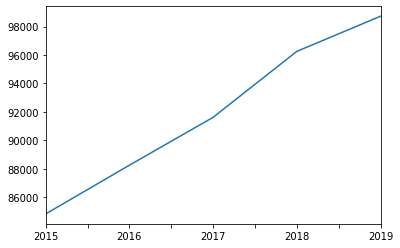

In [16]:
wes_citizens.sum().plot()

In [7]:
mor_citizens = pd.DataFrame()
mor_citizens["2015"] = citizens_dh_15["morocco"]
mor_citizens["2016"] = citizens_dh_16["morocco"]
mor_citizens["2017"] = citizens_dh_17["morocco"]
mor_citizens["2018"] = citizens_dh_18["morocco"]
mor_citizens["2019"] = citizens_dh_19["morocco"]

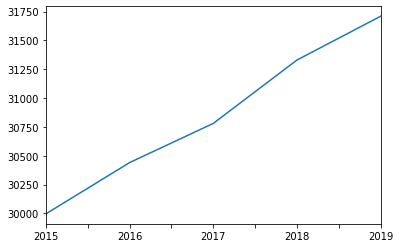

In [8]:
mor_citizens.sum().plot()

In [9]:
tur_citizens = pd.DataFrame()
tur_citizens["2015"] = citizens_dh_15["turkey"]
tur_citizens["2016"] = citizens_dh_16["turkey"]
tur_citizens["2017"] = citizens_dh_17["turkey"]
tur_citizens["2018"] = citizens_dh_18["turkey"]
tur_citizens["2019"] = citizens_dh_19["turkey"]

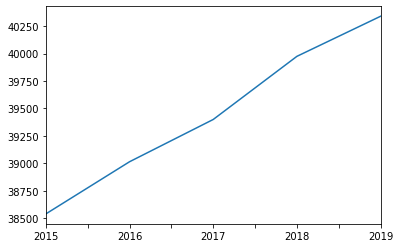

In [10]:
tur_citizens.sum().plot()

In [11]:
onw_citizens = pd.DataFrame()
onw_citizens["2015"] = citizens_dh_15["other_non_western"]
onw_citizens["2016"] = citizens_dh_16["other_non_western"]
onw_citizens["2017"] = citizens_dh_17["other_non_western"]
onw_citizens["2018"] = citizens_dh_18["other_non_western"]
onw_citizens["2019"] = citizens_dh_19["other_non_western"]

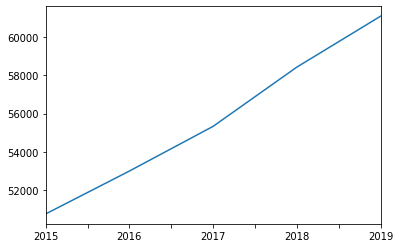

In [12]:
onw_citizens.sum().plot()